In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Linear Regression

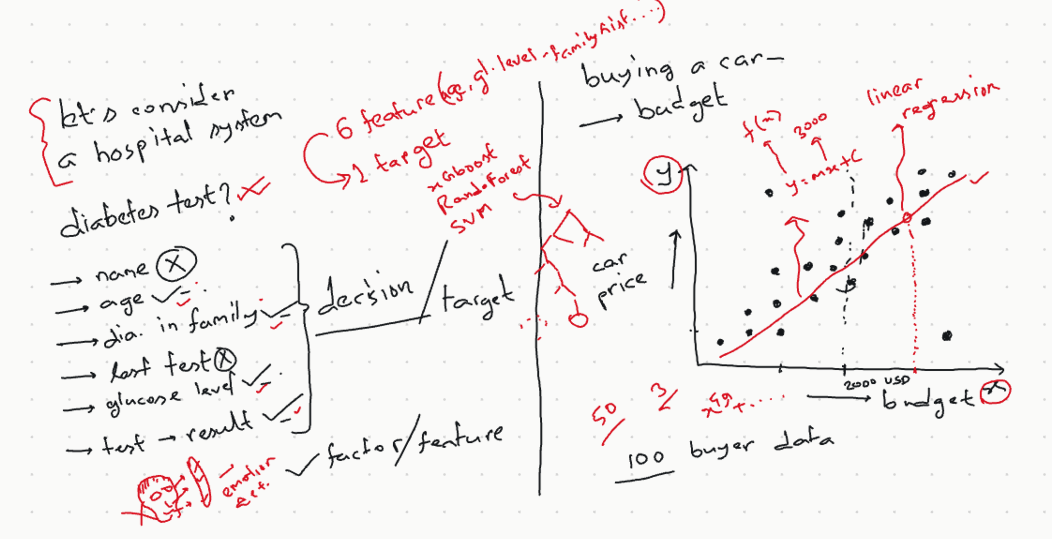

# Example 1

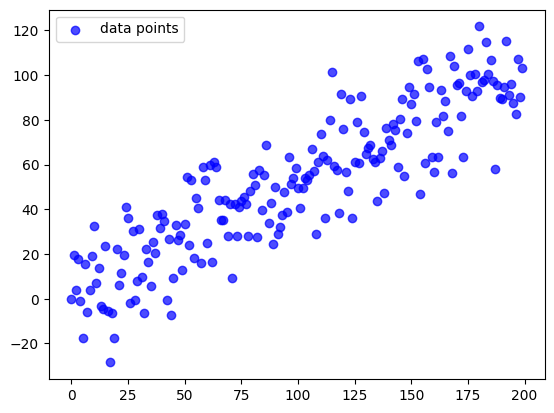

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




np.random.seed(135797531) # seed is set to fix the sequence of random process so that results are reproducible


N = 200

# generates an examples case
x = np.arange(0,N)
y = 0.5*x + 3 + np.sin(x/20)*np.sin(x/20) + 15*np.random.randn(N) 


plt.scatter(x, y, c='blue', alpha=0.7, label='data points')
plt.legend()
plt.show()

In [5]:
# create polynomial fit model for (x, y) data

model = np.polyfit(x, y, 1) # here 1 means degree of polynomial used to fit the data
# degree 1: polynomial looks like a_1*x + a_0 = f(x) or m*x+c=f(x)
# degree 2: polynomial looks like a_2*x^2 + a_1*x + a_0 = f(x)


model

array([0.50061451, 2.50412583])

In [6]:
# build function

def linregf(x):
    return model[0]*x + model[1]

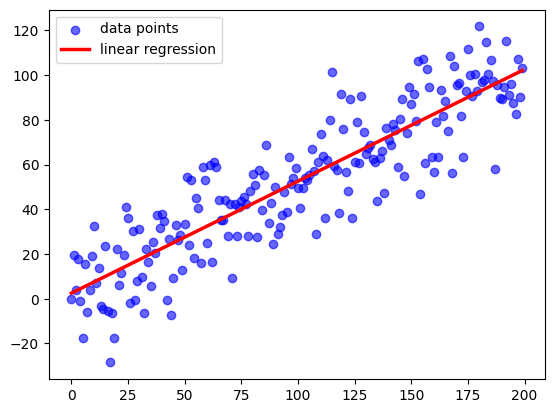

In [11]:
# plot

x_linreg = x
y_linreg = linregf(x_linreg)

plt.scatter(x, y, c='blue', alpha=0.6, label='data points')
plt.plot(x_linreg, y_linreg, 'r-', linewidth=2.5, label='linear regression')
plt.legend()
plt.show()

Model weights: [-2.02531724e-04  5.40918324e-01  1.17410000e+00]


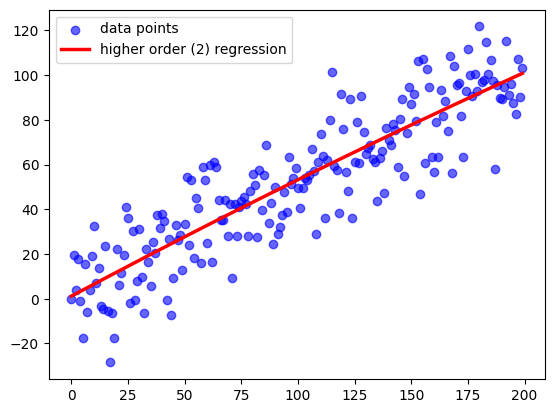

In [15]:
# higher degree fit

model2 = np.polyfit(x, y, 2)

print(f'Model weights: {model2}')

def linreg2(x):
    return model2[0]*x**2 + model2[1]*x + model2[2]

x_linreg2 = x
y_linreg2 = linreg2(x_linreg2)

plt.scatter(x, y, c='blue', alpha=0.6, label='data points')
plt.plot(x_linreg2, y_linreg2, 'r', linewidth=2.5, label='higher order (2) regression')
plt.legend()
plt.show()

# second order regression example

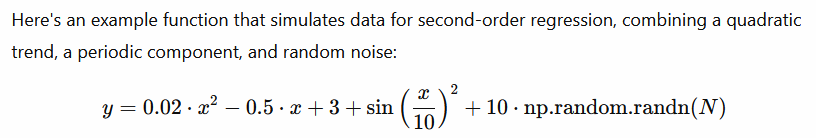

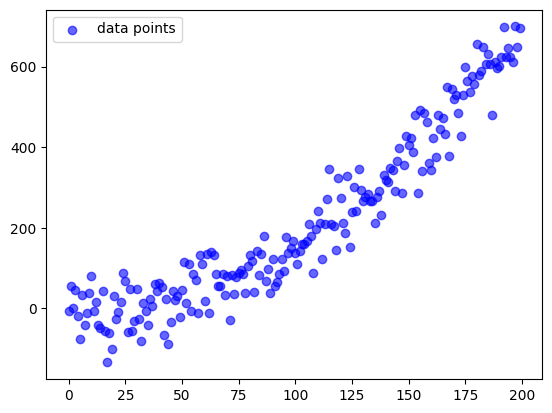

In [18]:
np.random.seed(135797531) 

N = 200

# generates an examples case for second order
x = np.arange(0,N)
y = 0.02 * x**2 - 0.5 * x + 3 + np.sin(x / 10)**2 + 50 * np.random.randn(N)


plt.scatter(x, y, c='blue', alpha=0.6, label='data points')
plt.legend()
plt.show()

Model weights: [   3.48378019 -131.26478171]


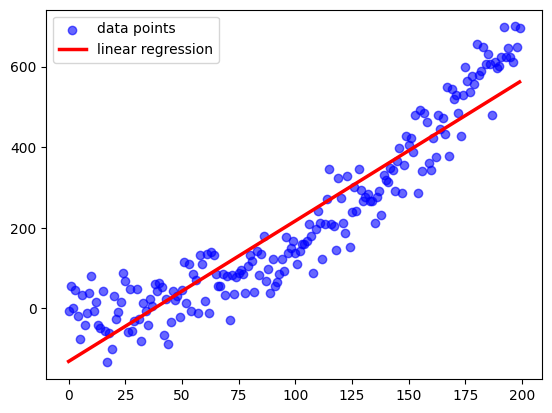

In [19]:
# let's try first order regression

model = np.polyfit(x, y, 1)
print(f'Model weights: {model}')

def linreg(x):
    return model[0]*x + model[1]

x_linreg = x
y_linreg = linreg(x_linreg)

plt.scatter(x, y, c='blue', alpha=0.6, label='data points')
plt.plot(x_linreg, y_linreg, 'r', lw=2.5, label='linear regression')
plt.legend()
plt.show()

Model weights: [ 0.01940018 -0.37685611 -3.86378367]


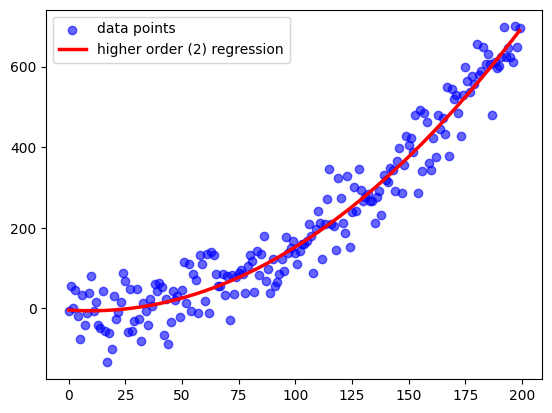

In [20]:
# let's try second order regression as first order does not look good

model2 = np.polyfit(x, y, 2)
print(f'Model weights: {model2}')

def ho_reg(x):
    return model2[0]*x**2 + model2[1]*x + model2[2]

x_horeg = x
y_horeg = ho_reg(x_horeg)

plt.scatter(x, y, c='blue', alpha=0.6, label='data points')
plt.plot(x_horeg, y_horeg, 'r', lw=2.5, label='higher order (2) regression')
plt.legend()
plt.show()

# Example 2

In [21]:
import pandas as pd

# data given as a dictionary

students = {'learning_hours': [10,4,3,16,45,23,43,21,32,12,31,11,18,25,29,13,19,43,24,27,36,45,47,54,22,13,34,23,56,30],
            'exam_results': [25,5,13,39,85,50,78,40,67,39,51,7,39,65,54,25,35,43,51,44,70,91,89,98,46,27,70,49,100,65]}

df = pd.DataFrame(data=students)

df

,learning_hours,exam_results
0,10,25
1,4,5
2,3,13
3,16,39
4,45,85
5,23,50
6,43,78
7,21,40
8,32,67
9,12,39


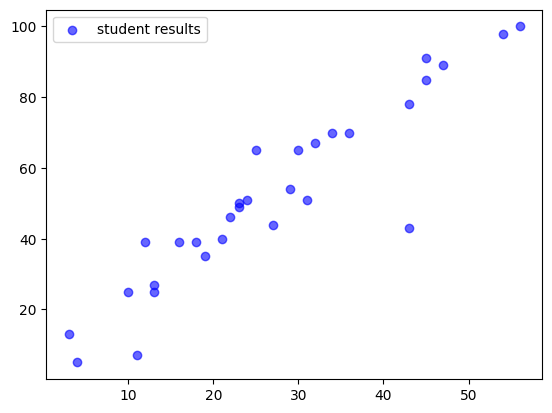

In [27]:
# let's extract data from the frame

x = df.learning_hours
y = df.exam_results

plt.scatter(x, y, c='blue', alpha=0.6, label='student results')
plt.legend()
plt.show()

Model weights: [1.6727794  6.89071555]


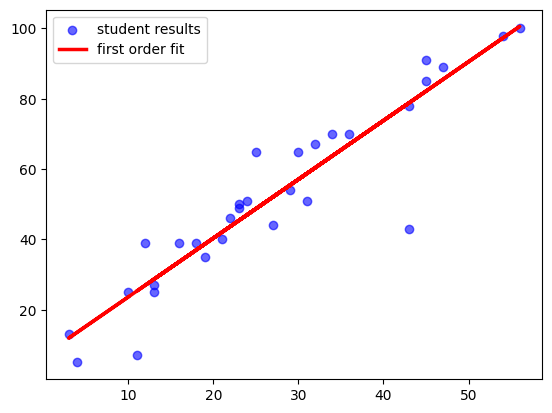

In [28]:
model = np.polyfit(x, y, 1)
print(f'Model weights: {model}')


def reg(x):
    return model[0]*x + model[1]

x_reg = x
y_reg = reg(x_reg)

plt.scatter(x, y, c='blue', alpha=0.6, label='student results')
plt.plot(x_reg, y_reg, 'r', linewidth=2.5, label='first order fit')
plt.legend()
plt.show()

# Ex.2 with smf and model.fit()

In [30]:
import statsmodels.formula.api as smf

df.shape

(30, 2)

In [32]:
# create model

model = smf.ols('y ~ x', df)
model

In [33]:
results = model.fit()
results 

In [34]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.10e-13
Time:                        12:14:58   Log-Likelihood:                -109.54
No. Observations:                  30   AIC:                             223.1
Df Residuals:                      28   BIC:                             225.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8907      3.805      1.811      0.0

In [35]:
results.params

# here intercept means c in f(x) = mx + c
# x means the coeff. of x i.e. m in f(x) = mx + c
# the fitting line is f(x) = 1.67x + 6.89

Intercept    6.890716
x            1.672779
dtype: float64

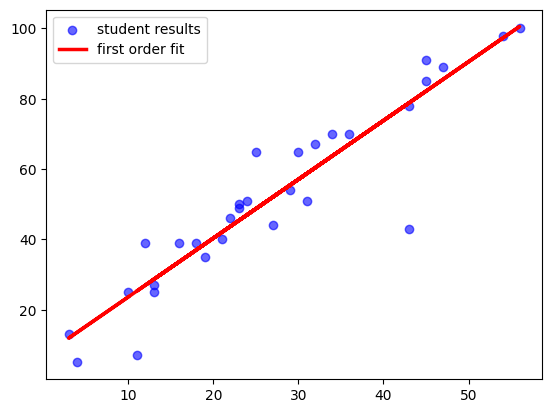

In [39]:
def smf_reg(x):
    return results.params['x']*x + results.params['Intercept']

x_reg = x
y_reg = smf_reg(x_reg)

plt.scatter(x, y, c='blue', alpha=0.6, label='student results')
plt.plot(x_reg, y_reg, 'r', linewidth=2.5, label='first order fit')
plt.legend()
plt.show()

# Ex.3 using poly1d
**Generates a prediction function, also can calculate r-square value**

In [42]:
# given data
students = {'learning_hours': [10,4,3,16,45,23,43,21,32,12,31,11,18,25,29,13,19,43,24,27,36,45,47,54,22,13,34,23,56,30],
            'exam_results': [25,5,13,39,85,50,78,40,67,39,51,7,39,65,54,25,35,43,51,44,70,91,89,98,46,27,70,49,100,65]}

# make dataframe
df = pd.DataFrame(data=students)

# get x, y values
x = df.learning_hours
y = df.exam_results

# regression model
model = np.polyfit(x, y, 1)

# generate prediction function
pred = np.poly1d(model)

# generate prediction
print(f'If a student studies 40 hours, he is expected to get {pred(40)} marks')
print(f'If a student studies 29.5 hours, he is expected to get {pred(29.5)} marks')

# r-squared value (to determine how good the fit is)
from sklearn.metrics import r2_score
print(f'R-squared value: {r2_score(y, pred(x))}')

If a student studies 40 hours, he is expected to get 73.80189149387697 marks
If a student studies 29.5 hours, he is expected to get 56.237707809551516 marks
R-squared value: 0.864697739323846


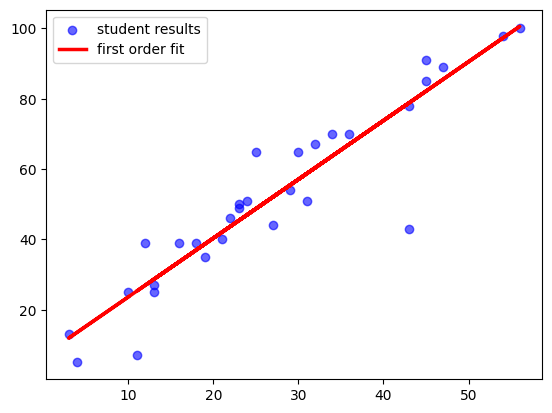

In [43]:
# plot

y_pred = pred(x_reg)

plt.scatter(x, y, c='blue', alpha=0.6, label='student results')
plt.plot(x, y_pred, 'r', linewidth=2.5, label='first order fit')
plt.legend()
plt.show()

# Error Bar concept

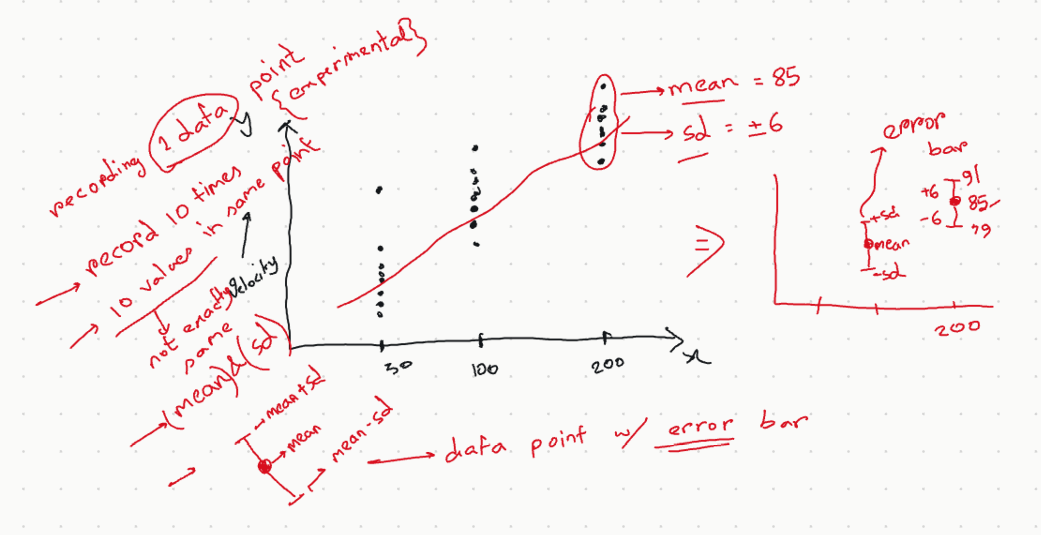

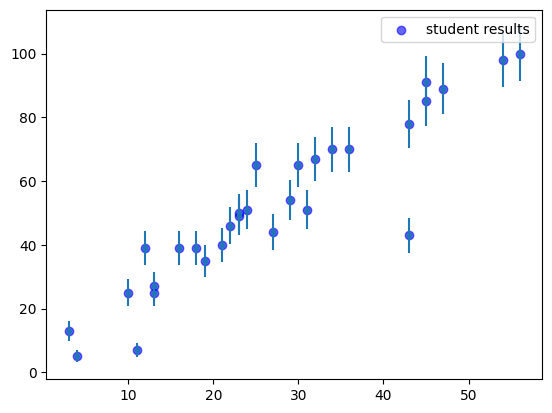

In [44]:
y_err = 0.85*np.sqrt(y) # generates fake error

plt.scatter(x, y, c='blue', alpha=0.6, label='student results')
plt.errorbar(x, y, yerr=y_err, fmt='.')
plt.legend()
plt.show()